# Mécanisme de faucheuse

![](faucheuse.png)

## Equations de liaison

Le système d'équation de liaison est donnée par la condition $O_3 \in \left( O_{1,2},\vec{y_2} \right) \hspace{0.5cm} \Rightarrow \hspace{0.5cm} \begin{cases} \overrightarrow{O_2O_3} \cdot \vec{x_2} = 0 \\ \overrightarrow{O_2O_3} \cdot \vec{z_2} = 0\end{cases}$

Ce qui conduit aux système d'équations de liaison :

$\hspace{3cm} \begin{cases} f_1(x,\theta)=x cos(\alpha)+ h cos(\psi) sin(\alpha)=0 \\ f_2(x,\theta)= x sin(\theta)sin(\alpha)-h \left( cos(\psi)sin(\theta)cos(\alpha) + sin(\psi)cos(\theta)\right) \end{cases}$

qui possède la solution analytique : 
$ \hspace{0.5cm} x=-h cos(\psi)tan(\alpha) \hspace{1cm}  \text{et} \hspace{1cm} tan(\theta)=-tan(\psi)cos(\alpha) $

Nous allons utiliser cette solution analytique pour valider la résolution numérique de ce système d'équations non linéaires

## Tracé de la solution analytique

In [1]:
import numpy as np
from numpy import pi
import matplotlib.pyplot as plt
from numpy.linalg import inv, norm

In [2]:
# paramétres géométrique décalage des axes h(m) et inclinaison angulaire de l'arbre d'entrée alpha(rd)
h=0.1; alpha_deg=15; alpha=alpha_deg*pi/180
#
# vitesse de rotation du villebrequin N (tr/min) omega(rd/s)
#
N=1000; omega=N*2*pi/60
# 
# le vecteur inconnu sera z=[x,theta], on va définir ici sa valeur initiale lorsque psi est nul
z = np.array([-h*np.tan(alpha), 0])
#
# définition des paramétres de mouvement pour mieux comprendre de quoi l'on parle en lien
# avec la figure ci-dessus
x=z[0]; theta=z[1]; psi0=0
#
# amplitude de simulation amp_N (en nombre de tours du vilebrequin) amp_deg (en deg) et amp (en rd)
amp_N=1; amp_deg=amp_N*360; amp=amp_N*2*pi
#
# imcrement de simulation dpsi_deg (deg) dpsi (rd)
dpsi_deg=5; dpsi=dpsi_deg*pi/180;
#
# nombre d'incrément de simulation
ninc=np.int32(np.ceil(amp/dpsi));

Définition la solutions analytiques $x_a$ et $\theta_a$ pour toutes les valeurs de $\psi$ situées dans l'intervalle défini ci-dessus

In [3]:
psi_a = np.linspace(0, amp, ninc)
x_a=
theta_a=

supression des saut (de +$\pi$) dans l'évolution de $\theta_a$ introduits par la fonction $atan$

In [4]:
saut=np.zeros(ninc)
index=0
for i in range(ninc-1):
    if np.abs(theta_a[i+1]-theta_a[i]) > pi/2:
        index=index+1
    saut[i+1]=index*pi
theta_a=theta_a-saut
print(saut)

Tracé de $ x=f_x(\psi)$

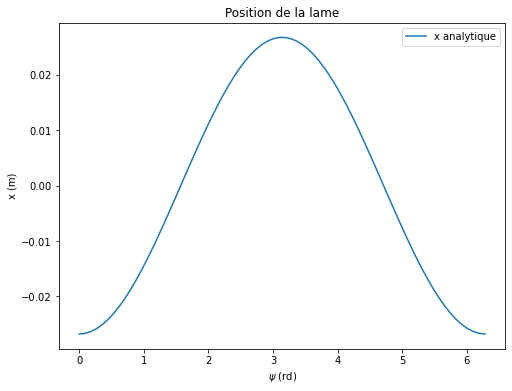

In [5]:
plt.figure(figsize=(8, 6))
plt.xlabel('$ \psi $ (rd)')
plt.ylabel('x (m)')
plt.title('Position de la lame')
plt.plot(psi_a, x_a, label='x analytique')
plt.legend();

Tracé de $ \theta=f_{\theta}(\psi)$

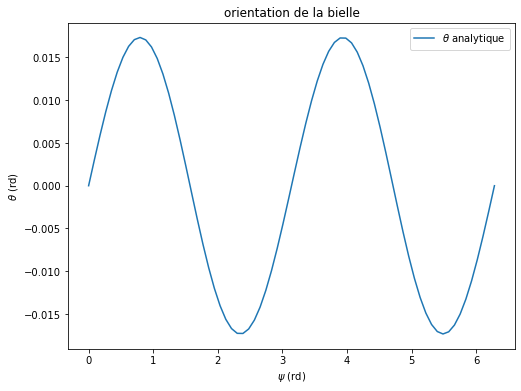

In [6]:
plt.figure(figsize=(8, 6))
plt.xlabel('$ \psi $ (rd)')
plt.ylabel(r'$\theta$ (rd)')
plt.title('orientation de la bielle')
plt.plot(psi_a, theta_a+psi_a, label=r'$\theta$ analytique')
plt.legend();

## Résolution numérique du système d'équations de liaison

In [7]:
# initialisation des tableaux pour stocker la solution numérique
x_n = np.zeros(ninc)
theta_n = np.zeros(ninc)
psi_n = np.zeros(ninc)
#
# parcours de positions du vilebrquin en incrémentant theta
for j in range(ninc):
#   initialisation du test de convergence et calcul de la valeur courante de theta
    ecart=1;
    psi=j*dpsi
#
# bloucle de Newton Raphson pour chaque valeur de theta
    while ecart > 1e-8:
# définition de la valeur courante des fonctions du système à résoudre
        f1=
        f2=
        f=np.array([f1,f2])
# définition de la matrice Jacobienne analytique
        J1=
        J2=
        J=np.array([J1,J2])
#  calcul de l'accroissement et de la nouvelle solution
        dz=
        z=
        ecart=
        x=z[0]
        theta=z[1]
# fin boucle while
#
    x_n[j]=x; theta_n[j]=theta; psi_n[j]=psi
# fin boucle for
#

## Tracé de la position de la lame 

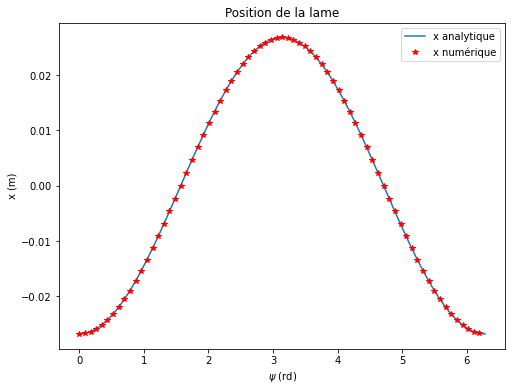

In [8]:
plt.figure(figsize=(8, 6))
plt.xlabel('$ \psi $ (rd)')
plt.ylabel('x (m)')
plt.title('Position de la lame')
plt.plot(psi_a, x_a, label='x analytique')
plt.plot(psi_n, x_n, '*r', label='x numérique')
plt.legend();

## tracé de l'orientaiton de la bielle 

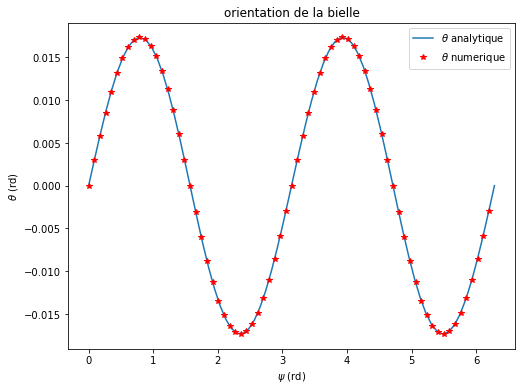

In [9]:
plt.figure(figsize=(8, 6))
plt.xlabel('$ \psi $ (rd)')
plt.ylabel(r'$\theta$ (rd)')
plt.title('orientation de la bielle')
plt.plot(psi_a, theta_a+psi_a, label=r'$\theta$ analytique')
plt.plot(psi_n, theta_n+psi_n, '*r', label=r'$\theta$ numerique')
plt.legend();

# calcul des dérivées temporelles de $x$ et $\phi$

In [10]:
xp_n2=np.zeros(ninc); xp_n1=np.zeros(ninc)
xp_a=n(psi_a)*np.th*omega*np.sian(alpha)
dt=dpsi/omega
for i in range(ninc):
    if i == 0:
        
    elif i == ninc-1 :
        
    else:
        


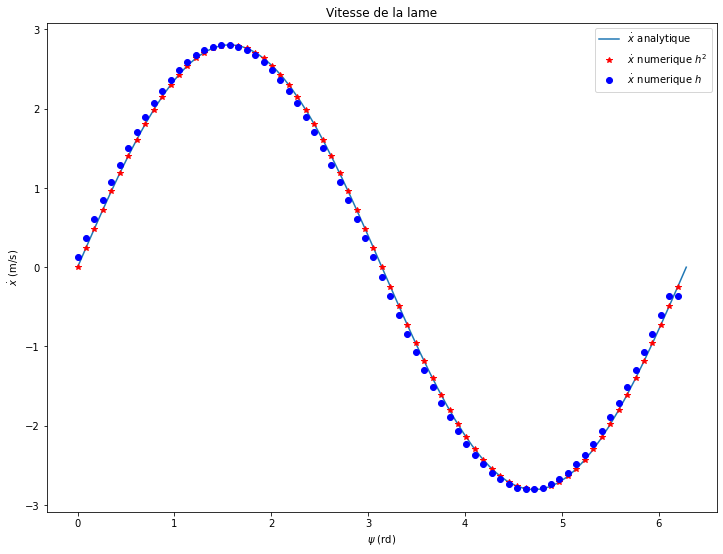

In [11]:
plt.figure(figsize=(12, 9))
plt.xlabel('$ \psi $ (rd)')
plt.ylabel('$\dot x$ (m/s)')
plt.title('Vitesse de la lame')
plt.plot(psi_a, xp_a, label='$ \dot x $ analytique')
plt.plot(psi_n, xp_n2, '*r', label='$ \dot x $ numerique $h^2$')
plt.plot(psi_n, xp_n1, 'ob', label='$ \dot x $ numerique $h$')
plt.legend();